# Macroprudential Policy and the Housing Market
This notebook solves and simulates the Heterogenous Agent Housing Market (HAH) model and produces the output contained in my Master's thesis. 

**Dependencies:**

The code structure builds upon the framework developed by Jeppe Druedahl & Co. in the [NumEconCopenhagen Project](https://github.com/NumEconCopenhagen)

Packages required for running the notebook are:
- [ConSav](https://pypi.org/project/ConSav/)
- [EconModel](https://pypi.org/project/EconModel/)
- [matplotlib](https://pypi.org/project/matplotlib/)
- [numpy](https://pypi.org/project/numpy/)
- [numba](https://pypi.org/project/numba/)
- [pandas](https://pypi.org/project/pandas/)

### Import packages and ModelClass

In [43]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import pandas as pd

nb.set_num_threads(4) # set equal to the number of cores in your CPU

from HAHModel import HAHModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import data for equivalence scale and life cycle income profile

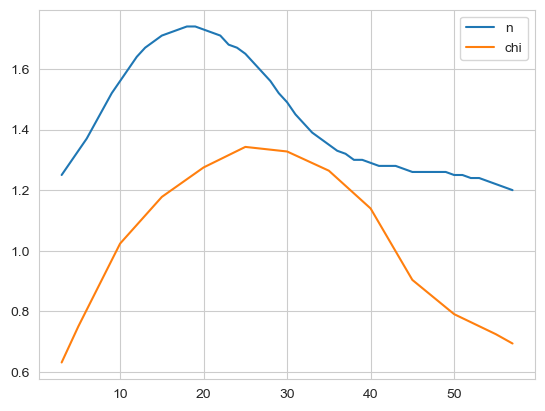

In [44]:
#wd = '/Users/Christian/Dropbox/KU - Polit/KA/Thesis'
data = pd.read_excel(
    io='equiscale.xlsx',
    sheet_name='output')

# interpolate income profile and slice
data['chi'] = data['chi'].interpolate(method='linear')+0.1 # quick fix to get mean ca. one
data = data.iloc[3:-3,:]

# extract arrays
n = data['n'].to_numpy(dtype='float')
chi = data['chi'].to_numpy(dtype='float') 

# plot data
data.plot(y=['n','chi'])
plt.show()

## Baseline model

In [56]:
# initialise an instance of baseline model
model_baseline = HAHModelClass(
    name='baseline',
    par={
        'zeta':10, 
        'nu':0.4,
        'alpha':2,
        'kappa':0.0, # no utility cost of moving
        'omega_ltv':0.95,
        'thetab':170,
        'K':10, 
        'phi':0.25,
        'chi':chi,
        'n':n,
        'do_print':True,
        'include_unemp':False
        })

model_baseline.precompile_numba() # solve model with very coarse grids --> speed gains
model_baseline.solve(do_assert=True)
model_baseline.simulate()
#model_baseline.save()

 t = 3 solved in 70.2 secs
 t = 2 solved in 49.3 secs
 t = 1 solved in 0.0 secs
 t = 0 solved in 0.0 secs
 total precomputation time  = 72.9 secs
 total stay-time  = 14.8 secs
 total ref-time   = 17.2 secs
 total buy-time   = 9.0 secs
 total rent-time   = 5.6 secs
 full model solved in = 119.5 secs
model simulated in 65.8 secs
numba precompiled in 188.3 secs
 last period bequest computed in 0.0 secs
 solved stayer problem in 0.1 secs
 solved refinance problem in 0.0 secs
 solved buyer problem in 0.0 secs
 solved renter problem in 0.0 secs
 t = 54 solved in 0.1 secs
 v_bar and q computed in 1.3 secs
 solved stayer problem in 0.1 secs
 solved refinance problem in 0.0 secs
 solved buyer problem in 0.0 secs
 solved renter problem in 0.0 secs
 t = 53 solved in 1.3 secs
 v_bar and q computed in 1.5 secs
 solved stayer problem in 0.1 secs
 solved refinance problem in 0.0 secs
 solved buyer problem in 0.0 secs
 solved renter problem in 0.0 secs
 t = 52 solved in 1.6 secs
 v_bar and q computed 

### Life Cycle Behaviour

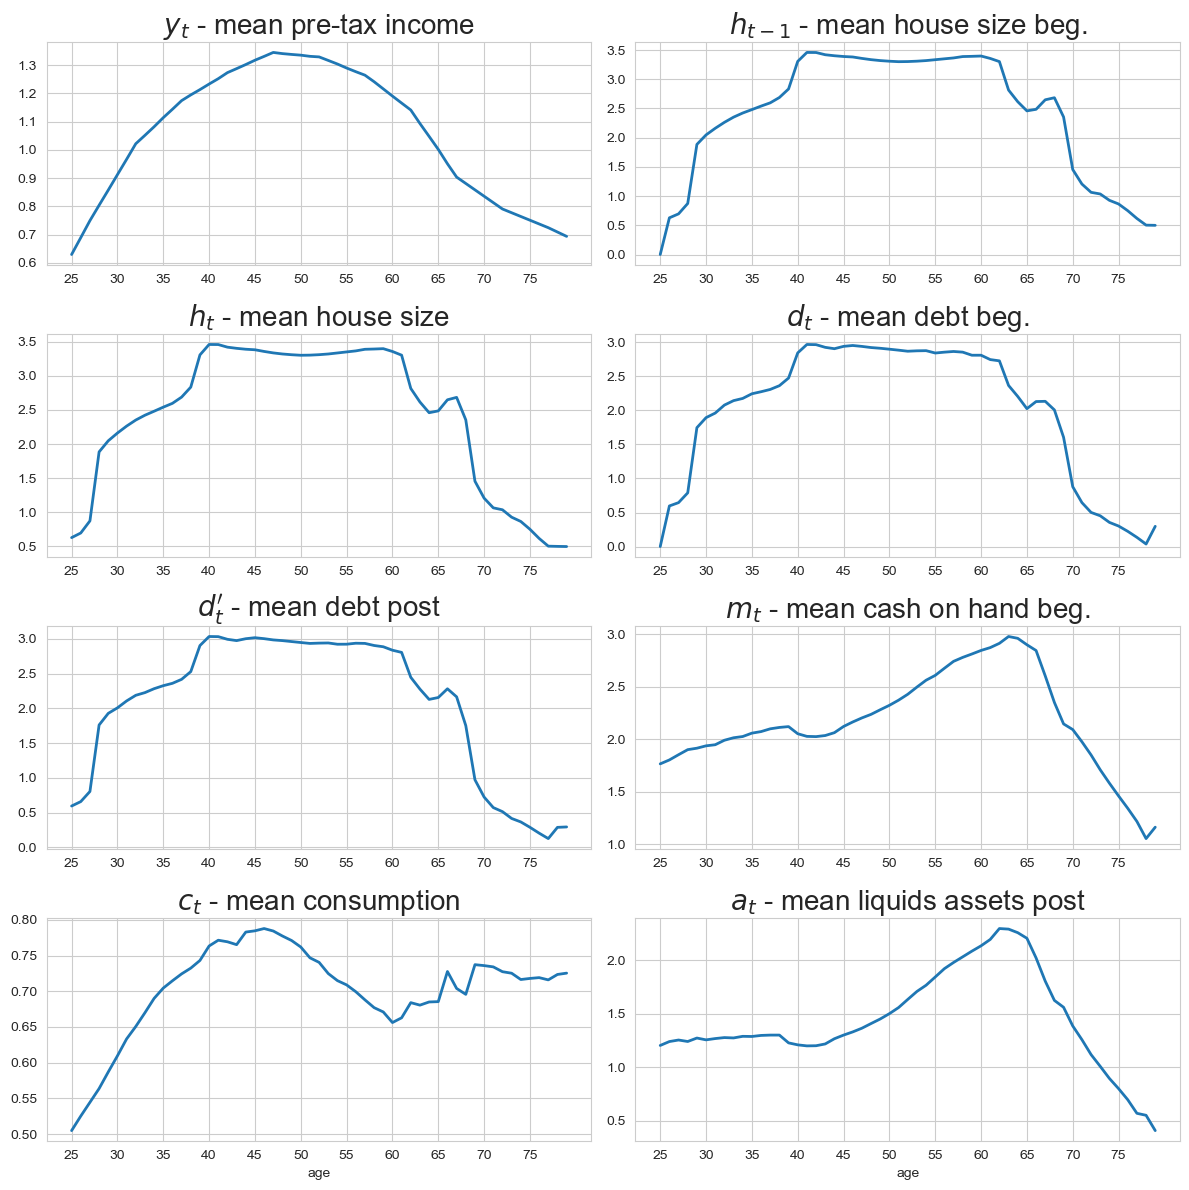

In [57]:
import figs

# average behaviour over the life cycle
figs.lifecycle(model_baseline)

In [58]:

sim = model_baseline.sim 
par = model_baseline.par

# validation check simulation
I = sim.c < 0
J = sim.discrete == 1
L = sim.discrete == 2 
IJ = I*J
IL = I*L
#J = (sim.c < 0 and sim.discrete == 0) 
print(np.sum(I))
print(np.sum(IJ))
print(np.sum(IL))
print(np.sum(I)/(par.simN*par.T))

#np.unique(sim.discrete[-2],return_counts=True)

np.where(sim.c < 0)

429
43
386
7.8e-05


(array([47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
        47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48,
        48, 48, 48, 48, 48, 48, 49, 49, 50, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 

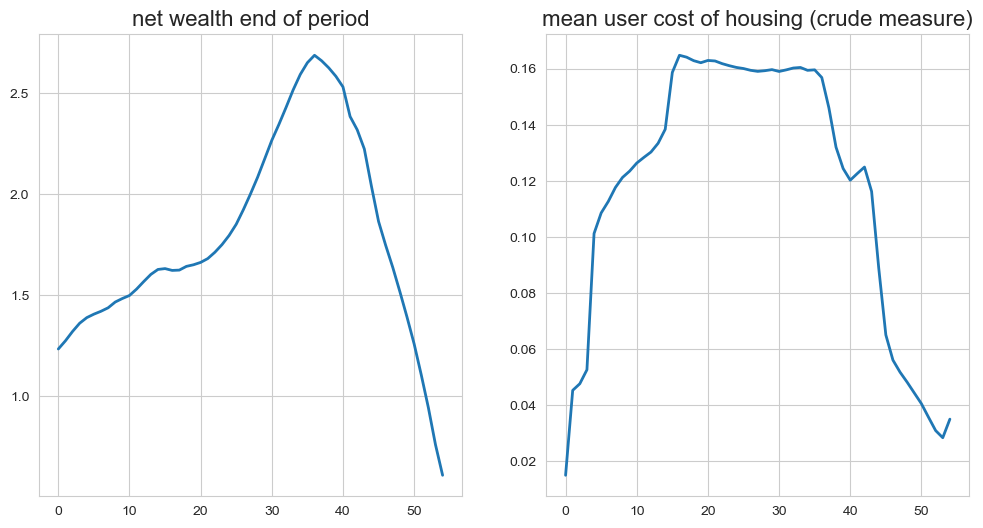

In [59]:
par = model_baseline.par
sim = model_baseline.sim

# compute net wealth
net_wealth = sim.a+sim.h_prime-sim.d_prime

# compute user cost
bool_stay = sim.discrete == 0
bool_ref = sim.discrete == 1
bool_buy = sim.discrete == 2
bool_rent = sim.discrete == 3
bool_da = sim.Tda > 0

rent_cost = bool_rent*par.q_r*sim.h_tilde
own_cost = (bool_stay+bool_ref)*(par.delta+par.tau_h0)*par.q*sim.h + bool_da*par.r_da*sim.d + (1-bool_da)*par.r_m*sim.d

user_cost = rent_cost + own_cost

### add two-bracket property tax later

# plot
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1)
ax.plot(np.mean(net_wealth,axis=1),lw=2)
ax.set_title('net wealth end of period',fontsize=16)

ax = fig.add_subplot(1,2,2)
ax.plot(np.mean(user_cost,axis=1),lw=2)
ax.set_title('mean user cost of housing (crude measure)',fontsize=16);

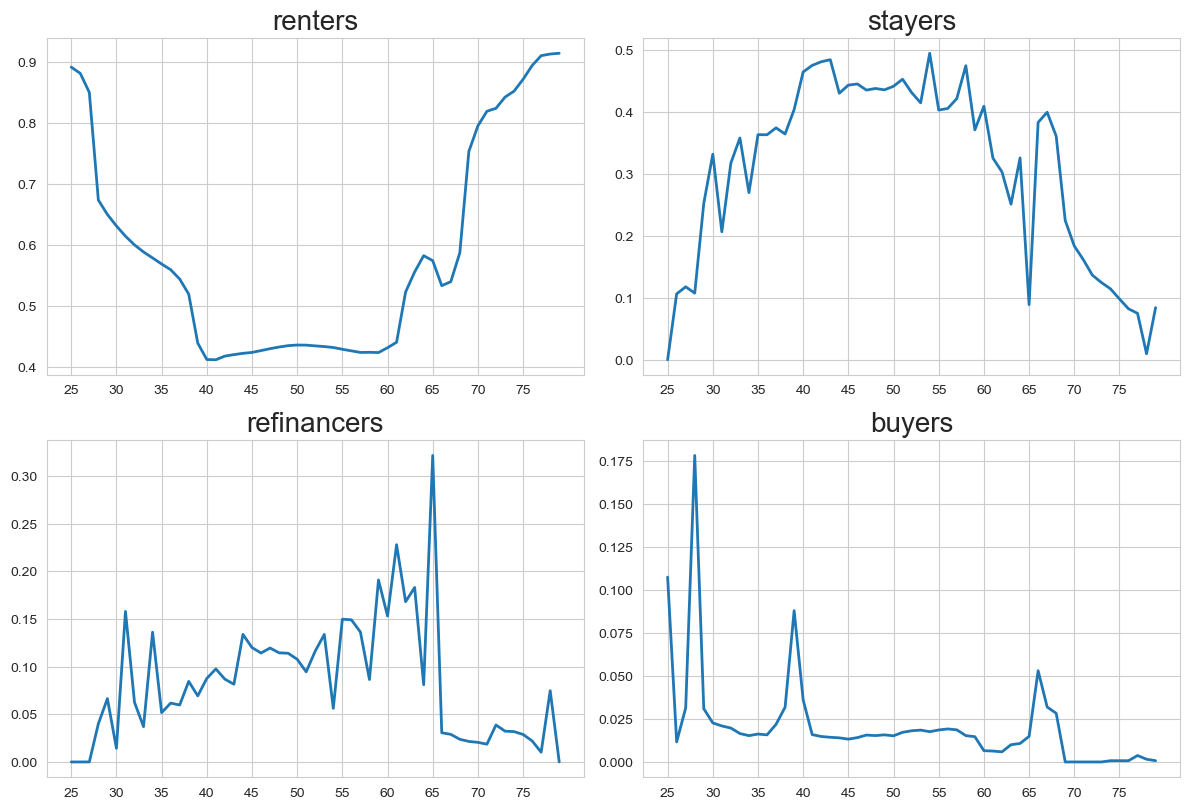

In [60]:
figs.homeownership(model_baseline)

In [61]:
import trans

# a. unpack
par = model_baseline.par
sim = model_baseline.sim 

# b. allocate containers and compute shares
own_share = np.zeros(par.T)
stay_share = np.zeros(par.T)
ref_share = np.zeros(par.T)
buy_share = np.zeros(par.T)
rent_share = np.zeros(par.T)


for t in range(par.T):
    stay_share[t] = np.sum(sim.discrete[t]==0)/par.simN
    ref_share[t] = np.sum(sim.discrete[t]==1)/par.simN
    buy_share[t] = np.sum(sim.discrete[t]==2)/par.simN
    rent_share[t] = np.sum(sim.discrete[t]==3)/par.simN
    own_share[t] = 1-rent_share[t]

print(f'mean homeownership rate is {np.mean(own_share)}')


mean homeownership rate is 0.4129683636363637


### Loop to match bequest level with initial wealth

In [58]:
# a. unpack
par = model_baseline.par
sim = model_baseline.sim 

# find mean bequest for initial guess
import trans
from EconModel import jit
with jit(model_baseline) as model:
    par = model.par
    ab_tot = 0
    t = par.T-1
    for n in range(par.simN):
        ab_tot += trans.ab_plus_func(
            sim.a[t,n],
            sim.d_prime[t,n],
            sim.Tda_prime[t,n],
            sim.h_prime[t,n],
            par)
    ab_mean = ab_tot/par.simN
print(f'initial wealth is {np.sum(sim.a0):.4f}')
print(f'total bequest is {ab_tot:.4f}')
print(f'mean bequest is {ab_mean:.4f}')
print(f'average hh pre-tax income is {np.mean(sim.y)*670_000:.4f}')

initial wealth is 113561.2615
total bequest is 56729.3286
mean bequest is 0.5673
average hh pre-tax income is 711043.7947


In [44]:
# agggregate housing demand
H_d = np.sum(sim.h) + np.sum(sim.h_tilde)
print(f'aggregate housing demand for purchase and rental is {H_d:.4f}')

aggregate housing demand for purchase and rental is 16759459.7500


In [60]:
import steady_state
steady_state.bequest_loop(model_baseline,ab_mean)

iteration = 1, discrepancy = 0.109966
iteration = 2, discrepancy = 0.048106
iteration = 3, discrepancy = 0.021102
iteration = 4, discrepancy = 0.009236
iteration = 5, discrepancy = 0.004032
iteration = 6, discrepancy = 0.001749
iteration = 7, discrepancy = 0.000780
iteration = 8, discrepancy = 0.000330
iteration = 9, discrepancy = 0.000150
iteration = 10, discrepancy = 0.000066
iteration = 11, discrepancy = 0.000028
iteration = 12, discrepancy = 0.000012
iteration = 13, discrepancy = 0.000006
iteration = 14, discrepancy = 0.000003
iteration = 15, discrepancy = 0.000001
iteration = 16, discrepancy = 0.000001
convergence achieved in 16 simulations, mean bequest = 0.344225


### Test solving the household problem for a few periods

In [ ]:
import HHproblems as hhp
from EconModel import jit

par = model_baseline.par

t = par.T-1
Td_len = np.fmin(t+2,par.Td_shape)
Tda_len = np.fmin(par.Tda_bar,par.T-t+1)

with jit(model_baseline) as model: 
    sol = model.sol
    par = model.par
    hhp.last_period_v_bar_q(t,sol,par)
    assert np.all((sol.inv_v_bar[t,:,:,0:Td_len,0:Tda_len,:,:] > 0) & 
       (np.isnan(sol.inv_v_bar[t,:,:,0:Td_len,0:Tda_len,:,:]) == False)), t
    assert np.all((sol.q[t,:,:,0:Td_len,0:Tda_len,:,:] > 0) & 
       (np.isnan(sol.q[t,:,:,0:Td_len,0:Tda_len,:,:]) == False)), t                  
    print('post decision is done')
    hhp.solve_stay(t,sol,par)
    assert np.all((sol.c_stay[t,:,:,0:Td_len,0:Tda_len,:,:] >= 0) & 
       (np.isnan(sol.c_stay[t,:,:,0:Td_len,0:Tda_len,:,:]) == False)), t
    assert np.all((sol.inv_v_stay[t,:,:,0:Td_len,0:Tda_len,:,:] >= 0) & 
       (np.isnan(sol.inv_v_stay[t,:,:,0:Td_len,0:Tda_len,:,:]) == False)), t
    print('stay is done')
    hhp.solve_ref_fast(t,sol,par)
    assert np.all((sol.c_ref_fast[t] >= 0) & (np.isnan(sol.c_ref_fast[t]) == False)), t
    assert np.all((sol.d_prime_ref_fast[t] >= 0) & (np.isnan(sol.d_prime_ref_fast[t]) == False)), t
    assert np.all((sol.inv_v_ref_fast[t] >= 0) & (np.isnan(sol.inv_v_ref_fast[t]) == False)), t
    print('refinance is done')
    hhp.solve_buy_fast(t,sol,par)
    assert np.all((sol.c_buy_fast[t] >= 0) & (np.isnan(sol.c_buy_fast[t]) == False)), t
    assert np.all((sol.d_prime_buy_fast[t] >= 0) & (np.isnan(sol.d_prime_buy_fast[t]) == False)), t
    assert np.all((sol.inv_v_buy_fast[t] >= 0) & (np.isnan(sol.inv_v_buy_fast[t]) == False)), t                
    print('buy is done')
    hhp.solve_rent(t,sol,par)
    assert np.all((sol.c_rent[t] >= 0) & (np.isnan(sol.c_rent[t]) == False))
    assert np.all((sol.inv_v_rent[t] >= 0) & (np.isnan(sol.inv_v_rent[t]) == False))            
    print('rent is done')
    t = t-1
    print(f'start solving t={t}')
    hhp.postdecision_compute_v_bar_q.py_func(t,sol,par)
    assert np.all((sol.inv_v_bar[t,:,:,0:Td_len,0:Tda_len,:,:] > 0) & 
       (np.isnan(sol.inv_v_bar[t,:,:,0:Td_len,0:Tda_len,:,:]) == False)), t
    assert np.all((sol.q[t,:,:,0:Td_len,0:Tda_len,:,:] > 0) & 
       (np.isnan(sol.q[t,:,:,0:Td_len,0:Tda_len,:,:]) == False)), t                  
    print('post decision is done')
    hhp.solve_stay(t,sol,par)
    assert np.all((sol.c_stay[t,:,:,0:Td_len,0:Tda_len,:,:] >= 0) & 
       (np.isnan(sol.c_stay[t,:,:,0:Td_len,0:Tda_len,:,:]) == False)), t
    assert np.all((sol.inv_v_stay[t,:,:,0:Td_len,0:Tda_len,:,:] >= 0) & 
       (np.isnan(sol.inv_v_stay[t,:,:,0:Td_len,0:Tda_len,:,:]) == False)), t
    print('stay is done')
    hhp.solve_ref_fast(t,sol,par)
    assert np.all((sol.c_ref_fast[t] >= 0) & (np.isnan(sol.c_ref_fast[t]) == False)), t
    assert np.all((sol.d_prime_ref_fast[t] >= 0) & (np.isnan(sol.d_prime_ref_fast[t]) == False)), t
    assert np.all((sol.inv_v_ref_fast[t] >= 0) & (np.isnan(sol.inv_v_ref_fast[t]) == False)), t
    print('refinance fast is done')
    hhp.solve_buy_fast(t,sol,par)
    assert np.all((sol.c_buy_fast[t] >= 0) & (np.isnan(sol.c_buy_fast[t]) == False)), t
    assert np.all((sol.d_prime_buy_fast[t] >= 0) & (np.isnan(sol.d_prime_buy_fast[t]) == False)), t
    assert np.all((sol.inv_v_buy_fast[t] >= 0) & (np.isnan(sol.inv_v_buy_fast[t]) == False)), t                
    print('buy fast is done')
    hhp.solve_rent(t,sol,par)
    assert np.all((sol.c_rent[t] >= 0) & (np.isnan(sol.c_rent[t]) == False))
    assert np.all((sol.inv_v_rent[t] >= 0) & (np.isnan(sol.inv_v_rent[t]) == False))            
    print('rent is done')

### Sanity checks

In [ ]:
from EconModel import jit
import utility

# a. unpack
with jit(model_baseline) as model:
    par = model_baseline.par
    sim = model_baseline.sim 

# b. check utility function
c = 1
h = 1
move = 0 
rent = 1
t = 20
n = par.n[t]
nu = 0.4
alpha = 1.1
s = (1-rent)*h/n + par.phi*rent*h/n
print(f' rent utility is {utility.func(c,h,move,rent,t,par)}')
print(f' own utility is {utility.func(c,h,move,0,t,par)}')
print(f' diff is {utility.func(c,h,move,rent,t,par)-utility.func(c,h,move,0,t,par)}')
print(f' s ={s}')
print(f' u(s) ={nu/(1-alpha)*s**(1-alpha)}')
print(f' u(h) ={nu/(1-alpha)*(h/n)**(1-alpha)}')
print(f' diff is {nu/(1-alpha)*s**(1-alpha)-nu/(1-alpha)*(h/n)**(1-alpha)}')

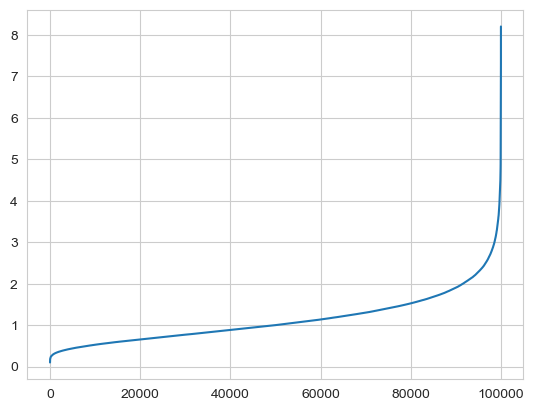

In [183]:
plt.plot(np.sort(sim.a0))